In [1]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays
import sap # To create morphological trees


# Max-tree and attribute filtering

![](img/max_pruning.png)

## 0. Setup: Load the DSM tile

- Load the dsm tile `tile_path` 

In [2]:
data_dir = Path('img_data/')
list(data_dir.glob('*.tif'))

[WindowsPath('img_data/dsm_vox_50cm_tile_-11_0.tif'),
 WindowsPath('img_data/dsm_vox_50cm_tile_-12_0.tif'),
 WindowsPath('img_data/dsm_vox_50cm_tile_-7_1.tif')]

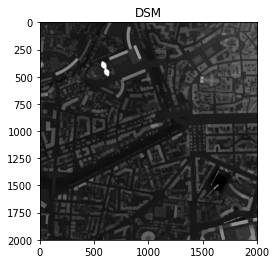

In [4]:
tile_path = Path('img_data/dsm_vox_50cm_tile_-12_0.tif')

# Load DSM 
image = rio.open(tile_path)
dsm = image.read(1)

plt.imshow(dsm, cmap='gray')
plt.title('DSM')
plt.show()

## 1. Create the max-tree of the DSM with the Python package `sap`

- Create the max-tree of `dsm` (tip: don't forget that you can display docstrings with `?<package>`!)
- How many nodes have the max-tree?

In [15]:
# Your turn!
# ?sap
# Create the Max Tree of the DSM

max_tree = sap.MaxTree(dsm)
print("The Max Tree of the DSM has: ", max_tree.num_nodes(), "nodes")

The Max Tree of the DSM has:  6119633 nodes


## 2. Compute some attributes on the max-tree

- Get the nodes `area` attribute in a vector.
- Get the nodes `compactness` attributes.
- What is the size of the attribute vectors? Why?

In [20]:
# Your turn!

# area attribute
areaAttribute = max_tree.get_attribute('area')
print("Area Attribute: \n", areaAttribute)

# compactness attribute
compactness = max_tree.get_attribute('compactness')
print("Compactness Attribute: \n", areaAttribute)

Area Attribute: 
 [1.000000e+00 1.000000e+00 1.000000e+00 ... 4.003860e+06 4.003861e+06
 4.004001e+06]
Compactness Attribute: 
 [1.000000e+00 1.000000e+00 1.000000e+00 ... 4.003860e+06 4.003861e+06
 4.004001e+06]


In [21]:
# size of attribute vector
print('The size of the vector is: ', areaAttribute.shape[0])

The size of the vector is:  6119633


The size of the attribute vectors in the Max tree is  6119633 because the node size of the max tree is also  6119633. See the comparison in the code block below.

In [23]:
max_tree.num_nodes() == areaAttribute.shape[0]

True

## 3. Filter the DSM with attribute filtering!

We'll filter the DTM with a threshold on the area attributes.

+ Choose an area threshold
+ Get the vector of deleted nodes
+ Filter the tree according to the vector of deleted nodes
+ Display!

In [26]:
# Your turn!
# choose an area threshold
# area > 1000 pixels
# Get the vector of deleted nodes and filter the tree accordingly
filtered_dsm = max_tree.reconstruct(areaAttribute > 1000)
filtered_dsm.shape

(2001, 2001)

Text(0.5, 1.0, 'Threshold: Area > 1000')

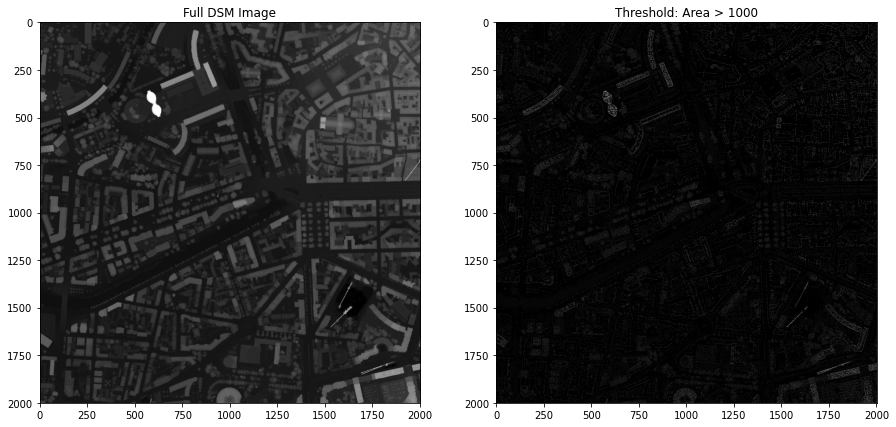

In [31]:
# display tree with deleted nodes
plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.imshow(dsm, cmap='gray')
plt.title('Full DSM Image')

plt.subplot(122)
plt.imshow(filtered_dsm, cmap='gray')
plt.title('Threshold: Area > 1000')